1 - Collect Data (I've done this in another file, will keep it short in this)

In [9]:
import pandas as pd

companies = [
    r'C:\\Users\\omerf\\OneDrive\\Masaüstü\\Data Analysis Project\\S&P Stock Market\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\omerf\\OneDrive\\Masaüstü\\Data Analysis Project\\S&P Stock Market\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\omerf\\OneDrive\\Masaüstü\\Data Analysis Project\\S&P Stock Market\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\omerf\\OneDrive\\Masaüstü\\Data Analysis Project\\S&P Stock Market\\individual_stocks_5yr\\MSFT_data.csv'
]

#Reading all the companies data and concatenating them into a single dataframe
data = pd.DataFrame()

for company in companies:
    df = pd.read_csv(company)
    data = pd.concat([data, df], ignore_index=True)

In [10]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [11]:
#Date is string we should convert to datetime64[ns]
data["date"] = pd.to_datetime(data["date"]) 
data["date"].head()

0   2013-02-08
1   2013-02-11
2   2013-02-12
3   2013-02-13
4   2013-02-14
Name: date, dtype: datetime64[ns]

In [12]:
#Since window value is 10 first 8 rows will be NaN
data["close"].rolling(window = 10).mean().head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
Name: close, dtype: float64

In [13]:
new_data = data.copy()

In [14]:
day = [10, 20, 50]

for d in day:
    new_data["close" + str(d)] = new_data["close"].rolling(d).mean()

In [15]:
new_data.tail()

,date,open,high,low,close,volume,Name,close10,close20,close50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [16]:
new_data.set_index("date", inplace=True)

In [17]:
company_names = data["Name"].unique()
company_names
company_names2 = ["Apple", "Amazon", "Google", "Microsoft"]

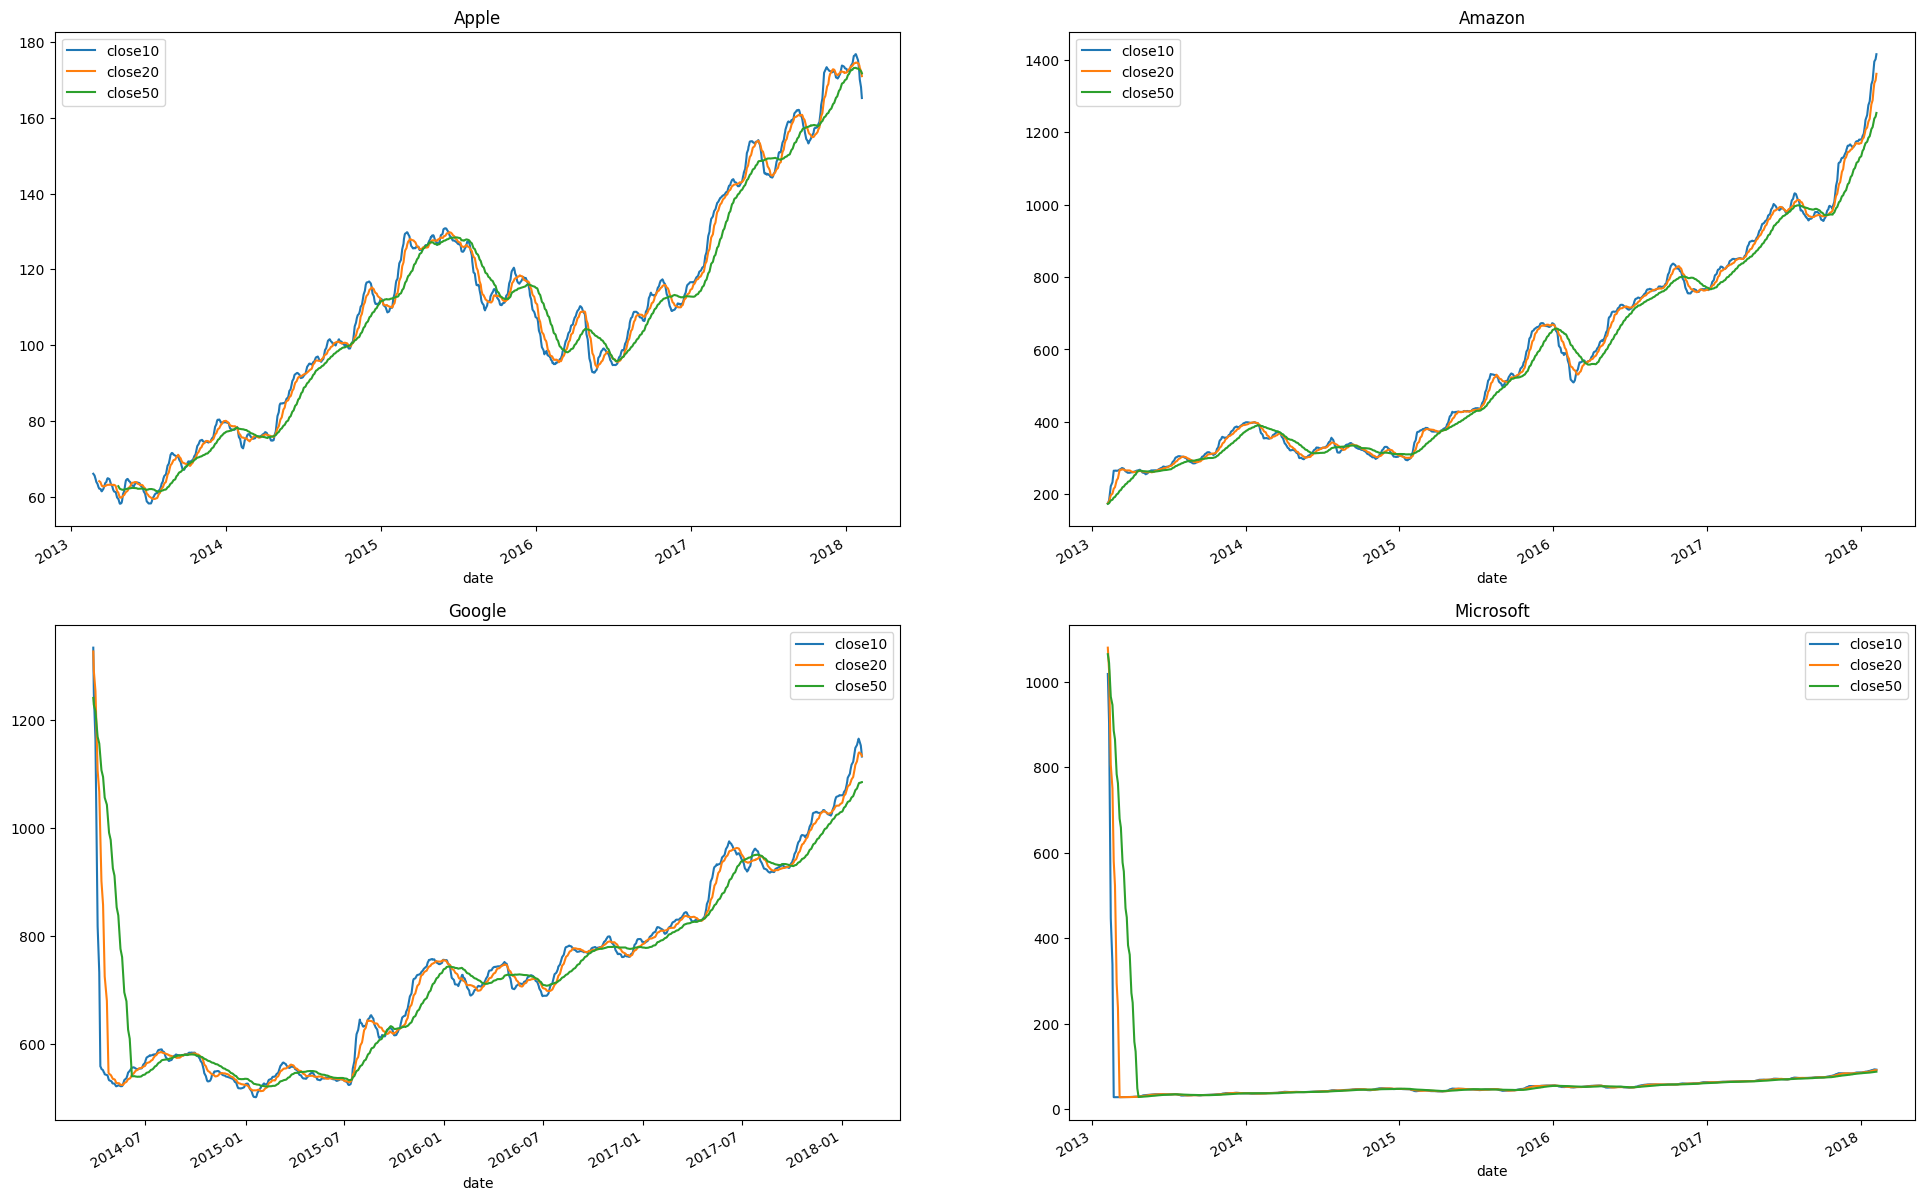

In [18]:
#Creates subplots for company (2,2)
#Change in Price analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(24,16))

for i,company in enumerate(company_names, 1):
    plt.subplot(2, 2 , i)
    filter = new_data["Name"] == company
    df = new_data[filter]
    df[["close10","close20","close50"]].plot(ax = plt.gca())
    plt.title(company_names2[i-1])

As can be seen from the graph, there is a rapid decline in Microsoft and Google in the early days. Although Google then started to rise, Microsoft could not catch a proper rise. Apple and Amazon, on the other hand, have risen starting from low levels.